In [110]:
import spacy
import pandas as pd
import matplotlib.pyplot as plt
from spacy.util import minibatch
from spacy.training import Example
from collections import Counter
from typing import Tuple, Dict, List, TypeVar, Generic
from dataclasses import dataclass
from tqdm import tqdm

In [ ]:
spacy.cli.download("es_core_news_sm")
spacy.cli.download("en_core_web_sm")

In [5]:
pipe_spa = spacy.load("es_core_news_sm")
pipe_en = spacy.load("en_core_web_sm")

# Part-of-Speech (POS)

In [6]:
text = (
    "esto es un ejemplo de etiquetado de palabras. Es importante analizar las "
    "etiquetas que nos ofrece Spacy"
)
doc = pipe_spa(text)

In [8]:
type(doc[0])

spacy.tokens.token.Token

In [9]:
token = doc[0]

In [11]:
token.pos_

'PRON'

In [12]:
spacy.explain(token.pos_)

'pronoun'

In [14]:
pos = []
for token in doc:
    pos.append((token.text, token.pos_, spacy.explain(token.pos_)))
df_scratch = pd.DataFrame(pos, columns=["token", "pos", "desc"])
df_scratch

,token,pos,desc
0,esto,PRON,pronoun
1,es,AUX,auxiliary
2,un,DET,determiner
3,ejemplo,NOUN,noun
4,de,ADP,adposition
5,etiquetado,ADJ,adjective
6,de,ADP,adposition
7,palabras,NOUN,noun
8,.,PUNCT,punctuation
9,Es,AUX,auxiliary


- Filtrado de sustantivos

In [15]:
only_noun = filter(lambda token: token.pos_ == "NOUN", doc)
only_noun = map(lambda token: token.text, only_noun)
print(" ".join(only_noun))

ejemplo palabras etiquetas


- Conteo de POS

In [17]:
pos = map(lambda token: token.pos_, doc)
counts = Counter(pos)
counts

Counter({'PRON': 3,
         'AUX': 2,
         'DET': 2,
         'NOUN': 3,
         'ADP': 2,
         'ADJ': 2,
         'PUNCT': 1,
         'VERB': 2,
         'PROPN': 1})

In [18]:
text = (
    "this is an example of word tagging. It is important to analyze the tags "
    "that are generated in Spacy."
)
doc = pipe_en(text)

In [19]:
pos = []
for token in doc:
    pos.append((token.text, token.pos_, spacy.explain(token.pos_)))
df_scratch = pd.DataFrame(pos, columns=["token", "pos", "desc"])
df_scratch

,token,pos,desc
0,this,PRON,pronoun
1,is,AUX,auxiliary
2,an,DET,determiner
3,example,NOUN,noun
4,of,ADP,adposition
5,word,NOUN,noun
6,tagging,NOUN,noun
7,.,PUNCT,punctuation
8,It,PRON,pronoun
9,is,AUX,auxiliary


In [21]:
pos = []
for token in doc:
    pos.append((token.text, token.tag_, spacy.explain(token.tag_)))
df_scratch = pd.DataFrame(pos, columns=["token", "tag", "desc"])
df_scratch

,token,tag,desc
0,this,DT,determiner
1,is,VBZ,"verb, 3rd person singular present"
2,an,DT,determiner
3,example,NN,"noun, singular or mass"
4,of,IN,"conjunction, subordinating or preposition"
5,word,NN,"noun, singular or mass"
6,tagging,NN,"noun, singular or mass"
7,.,.,"punctuation mark, sentence closer"
8,It,PRP,"pronoun, personal"
9,is,VBZ,"verb, 3rd person singular present"


# Dependency Parsing

In [22]:
pos = []
for token in doc:
    pos.append((token.text, token.dep_, token.head.text))
df_scratch = pd.DataFrame(pos, columns=["token 1", "dep", "token 2"])
df_scratch

,token 1,dep,token 2
0,this,nsubj,is
1,is,ROOT,is
2,an,det,example
3,example,attr,is
4,of,prep,example
5,word,compound,tagging
6,tagging,pobj,of
7,.,punct,is
8,It,nsubj,is
9,is,ROOT,is


In [23]:
fig = spacy.displacy.render(
    doc,
    style="dep",
    jupyter=True
)

In [25]:
options = {
    "distance": 110,
    "compact": True,
    "color": "white",
    "bg": "#000000",
    "font": "Times"
}

fig = spacy.displacy.render(
    doc, style="dep", jupyter=False, options=options
)

In [27]:
with open("deps.svg", "w") as f:
    f.write(fig)

# Named Entitiy Recoginition (NER)

In [30]:
text = (
    "My email is julara@unal.edu.co and I live in Colombia, specifically, in "
    "Bogota. Yesterday I had a meeting with Paulo and We went to El Corral."
)
doc = pipe_en(text)

In [31]:
doc.ents

(julara@unal.edu.co, Colombia, Bogota, Yesterday, Paulo, El Corral)

In [32]:
data = []
for ent in doc.ents:
    data.append(
        (ent.text, ent.label_, ent.start, ent.end, ent.start_char, ent.end_char)
        )
df_scratch = pd.DataFrame(
    data=data,
    columns=["Texto", "NER", "Inicio", "Fin", "Car Inicial", "Car Final"],
    )
df_scratch

,Texto,NER,Inicio,Fin,Car Inicial,Car Final
0,julara@unal.edu.co,PERSON,3,4,12,30
1,Colombia,GPE,8,9,45,53
2,Bogota,GPE,13,14,72,78
3,Yesterday,DATE,15,16,80,89
4,Paulo,PERSON,21,22,111,116
5,El Corral,ORG,26,28,132,141


In [33]:
fig = spacy.displacy.render(
    doc,
    style="ent",
    jupyter=True
)

# Components

In [34]:
pipe = spacy.load("en_core_web_sm")
pipe

In [35]:
pipe.component_names

['tok2vec',
 'tagger',
 'parser',
 'senter',
 'attribute_ruler',
 'lemmatizer',
 'ner']

In [36]:
pipe = spacy.load(
    "en_core_web_sm",
    exclude=["tagger", "parser", "senter", "atribute_ruler", "lemmatizer", "ner"]
    )

In [37]:
doc = pipe("this is an example")

In [38]:
doc.vector

array([ 4.95897114e-01,  1.11053914e-01,  1.42467558e-01,  4.16396350e-01,
        4.16923463e-01, -3.66978347e-01,  6.33065760e-01,  2.08550692e-01,
       -4.27161425e-01,  5.45132458e-01,  3.83047432e-01,  1.41509533e-01,
       -7.64289573e-02,  8.76537800e-01, -5.30017316e-01, -1.55084640e-01,
       -4.28075016e-01, -3.68991166e-01, -2.01920852e-01,  8.57313514e-01,
       -3.16549122e-01, -5.32526970e-02,  1.26337305e-01, -6.33523583e-01,
       -4.68217432e-02, -6.20295882e-01,  2.52294779e-01,  6.61671162e-04,
        7.25250423e-01,  4.71120089e-01,  3.47805023e-01,  4.35377300e-01,
        5.39159536e-01, -7.56854653e-01,  2.34496713e-01, -1.47754833e-01,
        5.37803292e-01,  9.91569459e-03,  2.89449394e-02,  6.30915523e-01,
        1.15824707e-01,  9.92406905e-01,  1.03591546e-01,  2.41252169e-01,
       -3.39480937e-02,  1.11462235e+00, -6.61794782e-01,  2.59742260e-01,
       -1.81373656e-02, -4.55449790e-01, -6.95606947e-01, -1.75701827e-01,
        9.50686038e-02,  

In [39]:
doc.ents

()

In [44]:
%%shell
fname=`echo "hello world" | sed 's/hello/bye/g' | sed 's/ world//g'`
touch "${fname}"

# Blank

In [45]:
from typing import Callable
class MyList(list):
    def __init__(self, *args, **kwargs):
        super(MyList, self).__init__(*args, **kwargs)

    def __or__(self, fn: Callable):
        return fn(self)

In [46]:
x = MyList((1, 2, 3))

In [47]:
x | sum

6

In [69]:
df = pd.read_parquet("https://raw.githubusercontent.com/mindlab-unal/mlds4-datasets/main/u4/ner_dataset.parquet")
df

,sentence,token,pos,ner
0,1,Thousands,NNS,o
1,1,of,IN,o
2,1,demonstrators,NNS,o
3,1,have,VBP,o
4,1,marched,VBN,o
...,...,...,...,...
1048570,47959,they,PRP,o
1048571,47959,responded,VBD,o
1048572,47959,to,TO,o
1048573,47959,the,DT,o


<BarContainer object of 9 artists>

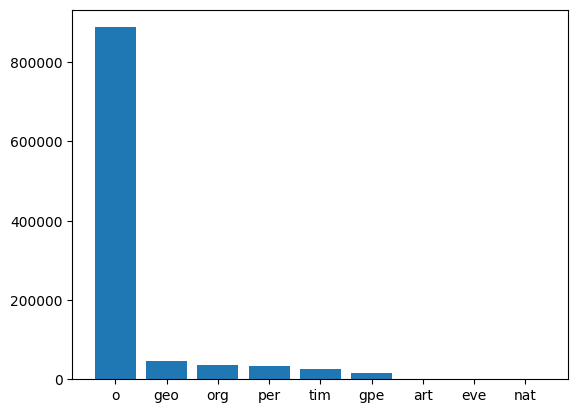

In [50]:
fig, ax = plt.subplots()
counts = df.ner.value_counts()
ax.bar(counts.index, counts)

In [52]:
" ".join(
    df
    .query("sentence == '2'")
    .token
    .to_list()
)

'Families of soldiers killed in the conflict joined the protesters who carried banners with such slogans as " Bush Number One Terrorist " and " Stop the Bombings . "'

In [53]:
" ".join(
    df
    .query("sentence == '2'")
    .ner
    .to_list()
)

'o o o o o o o o o o o o o o o o o o per o o o o o o o o o o o'

In [58]:
df.columns

Index(['sentence', 'token', 'pos', 'ner'], dtype='object')

In [74]:
@dataclass
class Sentence:
    sent: str
    ents: Dict[str, List[Tuple[int, int, str]]]

T = TypeVar("T")
class Schema(pd.DataFrame, Generic[T]):
    sentence: T
    token: T
    pos: T
    ner: T

x = Schema[pd.Series](df.to_dict())

In [72]:
x.ner.value_counts()

o      887908
geo     45058
org     36927
per     34241
tim     26861
gpe     16068
art       699
eve       561
nat       252
Name: ner, dtype: int64

In [78]:
def convert_sent(df: Schema[pd.Series]) -> Sentence:
    sent = " ".join(df.token.to_list())
    ents = []
    pos = 0
    for _, row in df.iterrows():
        if row.ner != 'o':
            ents.append(
                (pos, pos + len(row.token), row.ner)
            )
        pos += len(row.token) + 1
    return Sentence(sent=sent, ents={"entities": ents})

In [79]:
sent = x.query("sentence == '1'")
sent_conv = convert_sent(sent)

In [80]:
sent_conv

Sentence(sent='Thousands of demonstrators have marched through London to protest the war in Iraq and demand the withdrawal of British troops from that country .', ents={'entities': [(48, 54, 'geo'), (77, 81, 'geo'), (111, 118, 'gpe')]})

In [81]:
sent_conv.sent[48:54]

'London'

In [82]:
corpus = (
    x
    .groupby("sentence")
    .apply(convert_sent)
    .to_list()
)

In [83]:
corpus[:2]

[Sentence(sent='Thousands of demonstrators have marched through London to protest the war in Iraq and demand the withdrawal of British troops from that country .', ents={'entities': [(48, 54, 'geo'), (77, 81, 'geo'), (111, 118, 'gpe')]}),
 Sentence(sent='Iranian officials say they expect to get access to sealed sensitive parts of the plant Wednesday , after an IAEA surveillance system begins functioning .', ents={'entities': [(0, 7, 'gpe'), (87, 96, 'tim'), (108, 112, 'org')]})]

In [85]:
pipe = spacy.blank("en")

In [86]:
pipe

In [87]:
doc = pipe("this is an example")

In [88]:
pipe.component_names

[]

In [93]:
for token in doc:
    print(token)
    print(token.is_stop)
    print("=" * 20)

this
True
is
True
an
True
example
False


In [94]:
ner = pipe.add_pipe("ner")

In [95]:
ner

In [98]:
labels = x.ner.unique()
labels

array(['o', 'geo', 'gpe', 'per', 'org', 'tim', 'art', 'nat', 'eve'],
      dtype=object)

In [99]:
labels = labels[labels != 'o']
labels

array(['geo', 'gpe', 'per', 'org', 'tim', 'art', 'nat', 'eve'],
      dtype=object)

In [100]:
for label in labels:
    ner.add_label(label)

In [101]:
ner.labels

('art', 'eve', 'geo', 'gpe', 'nat', 'org', 'per', 'tim')

In [104]:
batches = minibatch(
    items=corpus,
    size=32
)

In [105]:
next(batches)

[Sentence(sent='Thousands of demonstrators have marched through London to protest the war in Iraq and demand the withdrawal of British troops from that country .', ents={'entities': [(48, 54, 'geo'), (77, 81, 'geo'), (111, 118, 'gpe')]}),
 Sentence(sent='Iranian officials say they expect to get access to sealed sensitive parts of the plant Wednesday , after an IAEA surveillance system begins functioning .', ents={'entities': [(0, 7, 'gpe'), (87, 96, 'tim'), (108, 112, 'org')]}),
 Sentence(sent='Helicopter gunships Saturday pounded militant hideouts in the Orakzai tribal region , where many Taliban militants are believed to have fled to avoid an earlier military offensive in nearby South Waziristan .', ents={'entities': [(20, 28, 'tim'), (62, 69, 'geo'), (97, 104, 'org'), (190, 195, 'geo'), (196, 206, 'geo')]}),
 Sentence(sent='They left after a tense hour-long standoff with riot police .', ents={'entities': []}),
 Sentence(sent='U.N. relief coordinator Jan Egeland said Sunday , U.S. , 

In [106]:
@dataclass
class HParams:
    iters: int
    lr: float
    drop: float

In [107]:
hparams = HParams(iters=100, lr=1e-3, drop=0.3)

In [108]:
opt = pipe.begin_training()
opt

In [109]:
opt.learn_rate = hparams.lr

In [112]:
losses = {}
loss = 0
pbar = tqdm(range(hparams.iters))

for _ in pbar:
    batch = next(batches)
    examples = []
    for raw_example in batch:
        example = Example.from_dict(
            pipe(raw_example.sent), raw_example.ents
        )
        examples.append(example)
    pipe.update(
        examples,
        sgd=opt,
        drop=hparams.drop,
        losses=losses
    )
    cur_loss = losses["ner"] - loss
    pbar.set_description(f"Loss: {cur_loss:.4f}")
    loss = losses["ner"]

Loss: 13.0077: 100%|██████████| 100/100 [00:29<00:00,  3.37it/s]


In [120]:
corpus[1]

Sentence(sent='Iranian officials say they expect to get access to sealed sensitive parts of the plant Wednesday , after an IAEA surveillance system begins functioning .', ents={'entities': [(0, 7, 'gpe'), (87, 96, 'tim'), (108, 112, 'org')]})

In [121]:
doc = pipe(corpus[1].sent)

In [122]:
doc.ents

(Iranian, Wednesday, IAEA)

In [123]:
spacy.displacy.render(doc, style="ent", jupyter=True)

In [124]:
pipe.to_disk("my_pipe")

In [125]:
nlp = spacy.load("my_pipe")

In [126]:
nlp

In [127]:
pipe = spacy.blank("es")

In [128]:
pipe

In [129]:
doc = pipe("esto es un ejemplo de palabras")

In [130]:
for token in doc:
    print(token.is_stop)

True
True
True
False
True
False
